In [9]:
import csv
import matplotlib.pyplot as pyplot
import seaborn as sns
from collections import Counter
import pandas as pd
from operator import itemgetter
from matplotlib.collections import BrokenBarHCollection

In [10]:
i = 1
allgenes = []
errorgenes = []
with open("../Data File(s): Genes and Regulation/gene.txt") as f:
    f2 = csv.reader(f, delimiter = "\t")
    for line in f2:
        if len(line) > 1:
            if len(line[1]) == 0:
                line[0] = "Unknown" + str(i)
                i = i+1
            try:
                start = int(line[2])
                length = int(line[3])-start
                allgenes.append((line[1], start, length))
            except:
                errorgenes.append(line[1])

reggenes = []
with open("../Data File(s): Genes and Regulation/generegulation_tmp.txt") as g:
    g2 = csv.reader(g, delimiter = "\t")
    for gene in g2:
        if len(gene) > 1:
            reggenes.append(gene[7])

reggenes2 = list(set(reggenes))
print(len(reggenes2)) 
print(len(allgenes)) 

            
        

1781
4647


In [11]:
#These genes we don't have loci for, and checks whether any of those genes are regulated
print(errorgenes)
for genes in errorgenes:
    if genes in reggenes2:
        print("Error in: " + genes)

['alaB', 'ackB', 'dgd']


In [13]:
cis = []
noreg = []
name = []
notsame = []
for gene in allgenes:
    if gene[0] in reggenes2:
        cis.append((gene[1],gene[2]))
        name.append(gene[0])
    else:
        noreg.append((gene[1],gene[2]))
        notsame.append(gene[0])
print(len(cis))
print(len(noreg))
print(list(set(reggenes2)-set(name)))
#There was nothing that was not a genename in the list of regulated genes
print(name[1:10]) 
print(notsame[1:10]) 
print(len(name))
print(len(notsame))

1781
2866
[]
['dcuB', 'hisM', 'zraS', 'cydC', 'acrD', 'garL', 'cpxR', 'aceA', 'aceB']
['cysZ', 'dfp', 'rhsE', 'yaaA', 'mepM', 'rodZ', 'ispB', 'csrD', 'yjiA']
1781
2866


In [14]:
reggenes_ecoli = pd.DataFrame(name)
nonreggenes_ecoli = pd.DataFrame(notsame)

In [ ]:
#optional save genes to csv
reggenes_ecoli.to_csv("ecoli_reggenes.csv", header = False, index = False)
nonreggenes_ecoli.to_csv("ecoli_nonreggenes.csv", header = False, index = False)

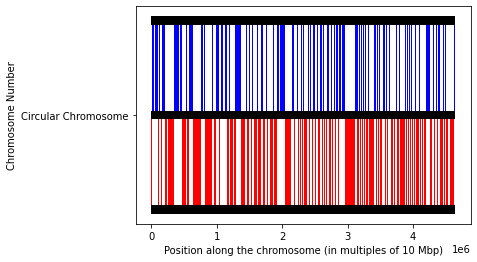

In [22]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
        
#Define the edges and staring/ending points of the chromosomes along with their sizes
yticklabels = []
yticks = []
yranges = [[20,5]]
yranges2 = [[25.5,5]]
beginner = (-5000,5000)
edge = [(4639221,2500)]
lengths = [(0,4639221)]
edge = [(4639221,2500)]
bottoms = [19.5, 19.5]
bottoms2 = [25,25]
tops = [25, 25]
tops2 = [30.5, 30.5]

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y.
for i in range(0,1):
    coll = BrokenBarHCollection(cis, yranges2[i], facecolor="blue", zorder= 1)
    ax.add_collection(coll)
for i in range(0,1):
    coll = BrokenBarHCollection(noreg, yranges[i], facecolor="red", zorder = 0.75)
    ax.add_collection(coll)
    
widthbox = 0.5
heightbox = 6
#This chunk plots the edges and ends of the chromosome, essentially everything in black
for i in range(0,1):
    col2 = BrokenBarHCollection([lengths[i]], [bottoms[i],widthbox], facecolor="black")
    col3 = BrokenBarHCollection([lengths[i]], [tops[i],widthbox], facecolor="black")
    col4 = BrokenBarHCollection([beginner,edge[i]], [bottoms[i],heightbox], facecolor="black")
    col5 = BrokenBarHCollection([lengths[i]], [bottoms2[i],widthbox], facecolor="black")
    col6 = BrokenBarHCollection([lengths[i]], [tops2[i],widthbox], facecolor="black")
    col7 = BrokenBarHCollection([beginner,edge[i]], [bottoms2[i],heightbox], facecolor="black")
    center = bottoms[i]+5.75
    yticks.append(center)
    ax.add_collection(col2)
    ax.add_collection(col3)
    ax.add_collection(col4)
    ax.add_collection(col5)
    ax.add_collection(col6)
    ax.add_collection(col7)

#Sets the labels
labeler = ["Circular Chromosome"]
for a in labeler:
    yticklabels.append(a)

#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axis('tight')
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 10 Mbp)")
pyplot.savefig('../Ecoli.pdf') 
pyplot.show()